<a href="https://colab.research.google.com/github/JaimeRedondo/Mushrooms_Classification/blob/master/Mushrooms_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries Import

In [ ]:
#working with images
! pip install opencv-python
from matplotlib import image
from matplotlib import pyplot
from skimage import io
import cv2
import os
import skimage
from skimage import data, io, filters, transform

#--Web scraping packages
from bs4 import BeautifulSoup
import requests
import itertools
from urllib.request import Request, urlopen
import urllib.request

#Pandas/numpy for data manipulation
import pandas as pd
import numpy as np
from urllib.request import urlopen

#barrita de progreso
from tqdm.notebook import tqdm
from time import sleep 

#Visualize data
%pylab inline
plt.style.use('seaborn-talk')

#import deep learning libraries
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau



Populating the interactive namespace from numpy and matplotlib


# Passing images to Drive to use in google colaboratory

In [ ]:
##Mounting our google colaboratory 

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Define Functions



Plotting function to see test and validation accuracy


In [ ]:
#To plot test,train,and validation accuracy metrics.

def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()

    plt.show()  


#to see mushrooms when I want
def plot_mushroom_image(N, imgs, labels):
    print(labels[N])
    plt.imshow(imgs[N,], cmap=plt.cm.binary)
    plt.grid(True)

## List with the mushrooms names (the folders names)

In [ ]:
## defining the main route (Guadalajara Mushrooms) in our drive , before we uploaded this folder.
## mushrooms directories --> the mushrooms names

main_route = '/content/drive/MyDrive/Mushrooms_Classification_Guadalajara'

mushrooms_directory=[]
for folder in tqdm(os.listdir(main_route)):
    if '.' in folder:
        pass
    else:
        mushrooms_directory.append(folder)
        
mushrooms_directory=sorted(mushrooms_directory)

## Pipeline with the process of each image for each mushroom

In [ ]:
#resize all images shape in 28x28 and print what photos are not available
def resize_photos(directory,main_route,size_photo,number_of_photos):
    
    for folder in tqdm(directory):
        for numero in range(number_of_photos):
            try:
                route = main_route + folder +'/'+ str(numero) + '.jpg'
                data_picture = io.imread(route)
                data_picture = cv2.resize(data_picture, size_photo)
                # save the images
                cv2.imwrite(route,data_picture)
            except:  
                print("Image number "+str(numero)+' of mushroom '+folder+' is not available')

#standarize 0_255 pixels to 0 - 1.
lista=[]
lista1=[]
def standarize_pixels_and_augmentation(directory,main_route,size_photo,number_of_photos):
    for folder in tqdm(directory):
        for numero in range(number_of_photos):
            try:
                route = main_route +folder +'/'+ str(numero) + '.jpg'
                image_rgb=io.imread(route)/255.0

                ##DATA AUGMENTATION##

                flip_1 = np.fliplr(image_rgb)
                #mirror with vertical line on right


                rot_90 = tf.image.rot90(image_rgb, k=1)
                rot_180 = tf.image.rot90(image_rgb, k=2)
                rot_270 = tf.image.rot90(image_rgb, k=3)
                #rotation of 90, 180 and 270 grades

                #now we are going to crop the imgs, can be whatever siza of crop we want
                height, width = image_rgb.shape[0:2]

                startRow = int(height*.15)

                startCol = int(width*.15)

                endRow = int(height*.85)

                endCol = int(width*.85)

                croppedImage = image_rgb[startRow:endRow, startCol:endCol]

                croppedImage = cv2.resize(croppedImage,size_photo)

                #now we are going to add contrast

                contrast_img = cv2.addWeighted(image_rgb, 1.5, np.zeros(image_rgb.shape, image_rgb.dtype), 0, 0)

                #desenfoque del 50% cogiendo la mediana de los pixeles
                blur_image = cv2.medianBlur(image_rgb,1)

                #add to list

                lista.append(image_rgb)
                lista.append(flip_1)
                lista.append(rot_90)
                lista.append(rot_180)
                lista.append(rot_270)
                lista.append(croppedImage)
                lista.append(contrast_img)
                lista.append(blur_image)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)            


def standarize_photos(directory,main_route,size_photo,number_of_photos):
    print("reshaping pictures...")
    resize_photos(directory,main_route,size_photo,number_of_photos)
    print("Normalizing pixels...")
    standarize_pixels_and_augmentation(directory,main_route,size_photo,number_of_photos)  

## Giving params to the function defined


In [ ]:
## params for the function defined before

directory = mushrooms_directory
main_route = '/content/drive/MyDrive/Mushrooms_Classification_Guadalajara/'
size_photo = (28,28)
number_of_photos = 150

standarize_photos(directory,main_route,size_photo,number_of_photos)

reshaping pictures...


imagen 100 de la seta Cratarellus cornucopioide no está disponible
imagen 101 de la seta Cratarellus cornucopioide no está disponible
imagen 102 de la seta Cratarellus cornucopioide no está disponible
imagen 103 de la seta Cratarellus cornucopioide no está disponible
imagen 104 de la seta Cratarellus cornucopioide no está disponible
imagen 105 de la seta Cratarellus cornucopioide no está disponible
imagen 106 de la seta Cratarellus cornucopioide no está disponible
imagen 107 de la seta Cratarellus cornucopioide no está disponible
imagen 108 de la seta Cratarellus cornucopioide no está disponible
imagen 109 de la seta Cratarellus cornucopioide no está disponible
imagen 110 de la seta Cratarellus cornucopioide no está disponible
imagen 111 de la seta Cratarellus cornucopioide no está disponible
imagen 112 de la seta Cratarellus cornucopioide no está disponible
imagen 113 de la seta Cratarellus cornucopioide no está disponible
imagen 114 de la seta Cratarellus cornucopioide no está dispon

Agaricus campestris131
Agaricus sylvaticus123
Agaricus sylvaticus125
Agaricus sylvaticus128
Amanita muscaria72
Boletus satanas107
Cratarellus cornucopioide81
Cratarellus cornucopioide100
Cratarellus cornucopioide101
Cratarellus cornucopioide102
Cratarellus cornucopioide103
Cratarellus cornucopioide104
Cratarellus cornucopioide105
Cratarellus cornucopioide106
Cratarellus cornucopioide107
Cratarellus cornucopioide108
Cratarellus cornucopioide109
Cratarellus cornucopioide110
Cratarellus cornucopioide111
Cratarellus cornucopioide112
Cratarellus cornucopioide113
Cratarellus cornucopioide114
Cratarellus cornucopioide115
Cratarellus cornucopioide116
Cratarellus cornucopioide117
Cratarellus cornucopioide118
Cratarellus cornucopioide119
Cratarellus cornucopioide120
Cratarellus cornucopioide121
Cratarellus cornucopioide122
Cratarellus cornucopioide123
Cratarellus cornucopioide124
Cratarellus cornucopioide125
Cratarellus cornucopioide126
Cratarellus cornucopioide127
Cratarellus cornucopioide128
C

## Creating the images and labels datasets

In [ ]:
images = np.array(lista)

labels = np.array(lista1)

### Creating the train, validation and tests datasets of images and labels

In [ ]:
# creamos lista para coger el conjunto de test

import random 

randomizado = np.array(range(0,len(images)))
enteros_aleatorios = randint(0,len(images),int(len(images)*0.10))

In [ ]:
mask = pd.Series(randomizado).isin(enteros_aleatorios)

In [ ]:
test_images = images[mask]
test_labels = labels[mask]
trainval_images = images[~mask]
trainval_labels = labels[~mask]

In [ ]:
### y ahora saco validation

randomizado1 = np.array(range(0,len(trainval_images)))
enteros_aleatorios1 = randint(0,len(trainval_images),int(len(trainval_images)*0.10))

mask1 = pd.Series(randomizado1).isin(enteros_aleatorios1)

validation_images = trainval_images[mask1]
validation_labels = trainval_labels[mask1]
train_images = trainval_images[~mask1]
train_labels = trainval_labels[~mask1]

Amanita citrina


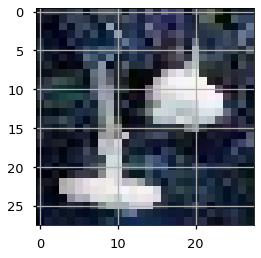

In [ ]:
plot_mushroom_image(5040,train_images,train_labels)

### Creating a dictionary with the labels and numbers for each label

In [ ]:
l2 = list(np.unique(labels))

In [ ]:
l1 = list(range(48))
l2 = list(np.unique(labels))
d = dict(zip(l1,l2))
#create a dictionary to use one hot encoder

Transform to one hot encoder the 48 classes 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
ohetrain = OneHotEncoder(sparse = False)
le = LabelEncoder()
OneHotTrain = ohetrain.fit_transform(le.fit_transform(train_labels).reshape(-1, 1))

In [ ]:
ohetest = OneHotEncoder(sparse = False)
le = LabelEncoder()
OneHotTest = ohetest.fit_transform(le.fit_transform(test_labels).reshape(-1, 1))

In [ ]:
oheval = OneHotEncoder(sparse = False)
le = LabelEncoder()
OneHotVal = oheval.fit_transform(le.fit_transform(validation_labels).reshape(-1, 1))

In [ ]:
#transformamos a onehot nuestros targets 

OneHotTrain.shape,OneHotTest.shape,OneHotVal.shape

((45997, 48), (5351, 48), (4860, 48))

# Applying CNN (Convolutional Neural Network)

## Creating our first convolutional neural network



### with stochastic gradient descent

In [ ]:
INIT_LR = 1e-3
epochs = 100
batch_size = 32
nClasses = 48

def cnn_model():
  model = Sequential()

  model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,3)))
  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
  model.add(MaxPool2D(pool_size=(3,3)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
  model.add(MaxPool2D(pool_size=(3,3)))
  #model.add(Dropout(0.25))

  
  model.add(Flatten())

  model.add(Dense(200, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(nClasses, activation='softmax'))
  
  model.summary()

  return model
  
  

In [ ]:
model = cnn_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [ ]:
## we choose the Adam optimizer

model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['categorical_accuracy'])

In [ ]:
h = model.fit(train_images,OneHotTrain, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images,OneHotVal))


Epoch 1/100
1438/1438 [==============================] - 38s 4ms/step - loss: 3.7171 - categorical_accuracy: 0.0454 - val_loss: 3.3613 - val_categorical_accuracy: 0.1121
Epoch 2/100
1438/1438 [==============================] - 5s 4ms/step - loss: 3.2679 - categorical_accuracy: 0.1270 - val_loss: 3.1153 - val_categorical_accuracy: 0.1623
Epoch 3/100
1438/1438 [==============================] - 5s 4ms/step - loss: 3.0558 - categorical_accuracy: 0.1783 - val_loss: 2.9767 - val_categorical_accuracy: 0.1907
Epoch 4/100
1438/1438 [==============================] - 5s 4ms/step - loss: 2.8802 - categorical_accuracy: 0.2177 - val_loss: 2.8420 - val_categorical_accuracy: 0.2183
Epoch 5/100
1438/1438 [==============================] - 5s 4ms/step - loss: 2.7069 - categorical_accuracy: 0.2549 - val_loss: 2.6696 - val_categorical_accuracy: 0.2628
Epoch 6/100
1438/1438 [==============================] - 5s 4ms/step - loss: 2.5801 - categorical_accuracy: 0.2839 - val_loss: 2.5980 - val_categorical_ac

### Other convolutional neural network...

In [ ]:
def build():  
  model = Sequential()

  model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,3)))
  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
  model.add(MaxPool2D(pool_size=(3,3)))
  model.add(Dropout(0.25))


  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
  #model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 #activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.25))


  model.add(Flatten())
  #model.add(Dense(1000, activation = "relu"))
  #model.add(Dropout(0.5))
  model.add(Dense(300, activation = "relu"))
  model.add(Dense(48, activation = "softmax"))

  model.summary()

  return model

### and other...

In [ ]:
#### otro modelo para Guada

def build():  
  model = Sequential()

  model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu', input_shape = (28,28,3)))

  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Dropout(0.25))


  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.15))


  model.add(Flatten())
  model.add(Dense(200, activation = "relu"))
  #model.add(Dropout(0.5))

  model.add(Dense(100, activation = "relu"))

  #model.add(Dense(75, activation = "relu"))

  model.add(Dense(48, activation = "softmax"))

  model.summary()

  return model

In [ ]:
model=build()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        1216      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 32)         

### two possible optimizers also...

In [ ]:
#### 2 optimizadores a ver cual funciona mejor

In [ ]:
model.compile(optimizer=optimizers.Adam(),loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

In [ ]:
#### probamos con sgd

model.compile(optimizer=optimizers.SGD(lr=0.01),loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

y vamos con el modelo

In [ ]:
 h = model.fit (train_images,OneHotTrain,batch_size= 32,epochs=50,validation_data=(validation_images,OneHotVal))

Epoch 1/50
970/970 [==============================] - 5s 4ms/step - loss: 3.4897 - categorical_accuracy: 0.0755 - val_loss: 2.9802 - val_categorical_accuracy: 0.1652
Epoch 2/50
970/970 [==============================] - 4s 4ms/step - loss: 2.8764 - categorical_accuracy: 0.1931 - val_loss: 2.7202 - val_categorical_accuracy: 0.2448
Epoch 3/50
970/970 [==============================] - 4s 4ms/step - loss: 2.6176 - categorical_accuracy: 0.2567 - val_loss: 2.4632 - val_categorical_accuracy: 0.3039
Epoch 4/50
970/970 [==============================] - 4s 4ms/step - loss: 2.4281 - categorical_accuracy: 0.3052 - val_loss: 2.3668 - val_categorical_accuracy: 0.3252
Epoch 5/50
970/970 [==============================] - 4s 4ms/step - loss: 2.2528 - categorical_accuracy: 0.3463 - val_loss: 2.2083 - val_categorical_accuracy: 0.3687
Epoch 6/50
970/970 [==============================] - 4s 4ms/step - loss: 2.1312 - categorical_accuracy: 0.3786 - val_loss: 2.1218 - val_categorical_accuracy: 0.3943
Epoc

### Evaluating the model

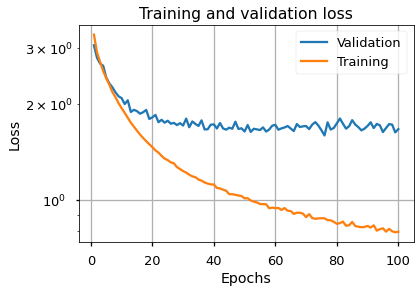

KeyError: ignored

In [ ]:
plot_metric(h,'loss')
plot_metric(h,'categorical_accuracy')

Amanita muscaria


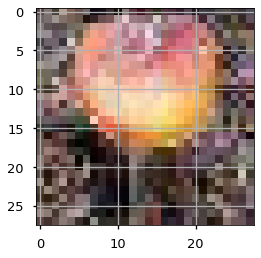

In [ ]:
plot_mushroom_image(560,test_images,test_labels)

In [ ]:
model.evaluate(test_images,OneHotTest)

112/112 [==============================] - 1s 5ms/step - loss: 1.6582 - accuracy: 0.5977


[1.6582069396972656, 0.5977107882499695]

In [ ]:
## evaluate if the mushrooms are between the 3 first

ohetest = OneHotEncoder(sparse = False)
le = LabelEncoder()
OneHotTest = ohetest.fit_transform(le.fit_transform(test_labels).reshape(-1, 1))

### Doing predictions

In [ ]:
y_pred = model.predict_proba(test_images)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
test_labels

array(['Agaricus arvensis', 'Agaricus arvensis', 'Agaricus arvensis', ...,
       'Tuber melanosporum', 'Tuber melanosporum', 'Tuber melanosporum'],
      dtype='<U25')

In [ ]:
df = pd.DataFrame(y_pred[0], columns = ['probabilities'])

In [ ]:
df['labels']=l2

In [ ]:
df_sort = df.sort_values('probabilities',ascending = False)[0:3]

In [ ]:
df_sort

,probabilities,labels
0,0.503070,Agaricus arvensis
29,0.266939,Macrolepiota procera
2,0.119569,Agaricus campestris


In [ ]:
type(test_images)

numpy.ndarray

In [ ]:
test_labels
target_names = pd.Series(test_labels).drop_duplicates()

In [ ]:
d.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [ ]:


predictions=[]
for i in y_pred:
  predictions.append(d.get(i))

In [ ]:
predictions

['Agaricus arvensis',
 'Russula vesca',
 'Russula vesca',
 'Clitocybe odora',
 'Amanita curtipes',
 'Agaricus arvensis',
 'Clitocybe odora',
 'Agaricus sylvaticus',
 'Agaricus campestris',
 'Agaricus arvensis',
 'Agaricus bitorquis',
 'Agaricus bitorquis',
 'Macrolepiota procera',
 'Agaricus campestris',
 'Agaricus campestris',
 'Agaricus campestris',
 'Macrolepiota mastoidea',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Russula cyanoxantha',
 'Clitocybe gibba',
 'Agaricus arvensis',
 'Agaricus campestris',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Clitocybe odora',
 'Clitocybe odora',
 'Clitocybe odora',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Agaricus sylvaticus',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Tuber aestivum',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Agaricus arvensis',
 'Agaricus campestris',
 'Agaricus campestris',
 'Lactarius controversus',

In [ ]:
test_labels

array(['Agaricus arvensis', 'Agaricus arvensis', 'Agaricus arvensis', ...,
       'Tuber melanosporum', 'Tuber melanosporum', 'Tuber melanosporum'],
      dtype='<U25')

In [ ]:
#### vamos a comprobar con una imagen aletaria que cojo de google.

import numpy as np
from google.colab import files

uploaded=files.upload()



Saving unnamed.jpg to unnamed.jpg


In [ ]:
route ='/content/istockphoto-1015452220-612x612.jpg'
route1 = '/content/images.jpeg'
route2 = '/content/images.jpeg'
route3 = '/content/maxresdefault.jpg'
route4 = '/content/Amanita_phalloides.jpg'
route5 = '/content/unnamed.jpg'
image_rgb=io.imread(route)/255.0
image_rgb1=io.imread(route1)/255.0
image_rgb2=io.imread(route2)/255.0
image_rgb3=io.imread(route3)/255.0
image_rgb4=io.imread(route4)/255.0
image_rgb5=io.imread(route5)/255.0

In [ ]:
data_picture = cv2.resize(image_rgb, (28, 28))
data_picture1 = cv2.resize(image_rgb1, (28, 28))
data_picture2 = cv2.resize(image_rgb2, (28, 28))
data_picture3 = cv2.resize(image_rgb3, (28, 28))
data_picture4 = cv2.resize(image_rgb4, (28, 28))
data_picture5 = cv2.resize(image_rgb5, (28, 28))

In [ ]:
pictures = np.array([data_picture,data_picture1,data_picture2,data_picture3,data_picture5])

In [ ]:
# predecimos la clase

pred_photos = model.predict_proba(pictures)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
pred_p

,probabilities,labels
15,0.232629,Boletus pinophilus
2,0.121061,Agaricus campestris
34,0.100236,Pleurotus eryngii


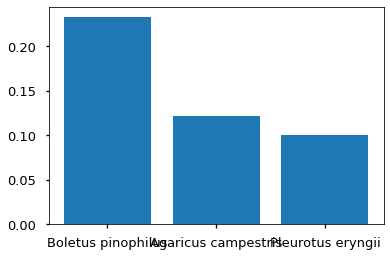

In [ ]:
df = pd.DataFrame(pred_photos[4], columns = ['probabilities'])
df['labels']=l2
df_sort = df.sort_values('probabilities',ascending = False)[0:3]
plt.bar(df_sort['labels'],df_sort['probabilities'])
df_sort

In [ ]:
predictions=[]
for i in pred_photos:
  predictions.append(d.get(i))

In [ ]:
predictions

['Amanita muscaria',
 'Amanita muscaria',
 'Amanita muscaria',
 'Agaricus arvensis']

### Evaluating the test data

In [ ]:
target_names

0               Agaricus arvensis
74             Agaricus bitorquis
130           Agaricus campestris
212           Agaricus sylvaticus
290              Amanita caesarea
361               Amanita citrina
434              Amanita curtipes
512              Amanita muscaria
587            Amanita pantherina
663            Amanita phalloides
741                Boletus aereus
823            Boletus aestivalis
892                Boletus edulis
964            Boletus erythropus
1033              Boletus luridus
1107           Boletus pinophilus
1170              Boletus satanas
1248        Cantharellus cibarius
1321              Clitocybe gibba
1404              Clitocybe odora
1472    Cratarellus cornucopioide
1551        Cratarellus lutescens
1629            Ganoderma lucidum
1710       Lactarius controversus
1787         Lactarius deliciosus
1873              Lactarius rufus
1949        Lactarius sanguifluus
2024                 Lepista nuda
2095       Macrolepiota mastoidea
2171         M

In [ ]:
predictions

['Amanita muscaria', 'Amanita muscaria']

In [ ]:
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(test_labels, predictions, labels=target_names)

ValueError: ignored

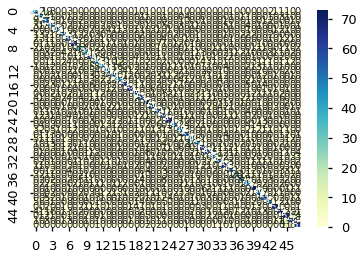

In [ ]:
sns.heatmap(cm,annot=True,cmap="YlGnBu")

28